"""

#### Author: Girish Dev Kumar Chaurasiya
#### Date: 11 Nov 2023


#### Project objective: We have to go through a lot of job vacancies while looking for a position that appears to be 
#### matching our expectation and it happens mainly due to the mismatch in skillset. However understanding skillset by 
#### reading through 100s of job descriptions might not be as effective and can also leave us confused. 

#### This project will try to solve this problem by reading through job descriptions on Linkedin and identifying key skillsets 
#### ranking them in terms of importance

"""

In [15]:
# libraries import #
# Import necessary libraries for data retrieval, manipulation, and analysis

import requests  # For making HTTP requests
import re  # For regular expressions
import time  # For time-related functions
from bs4 import BeautifulSoup  # For web scraping
import csv  # For CSV file handling
import numpy as np  # For numerical computing
import pandas as pd  # For data manipulation and analysis

# Text processing and analysis libraries #
# Libraries for text processing, feature extraction, and visualization

from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization
from wordcloud import WordCloud  # For creating word clouds
import matplotlib.pyplot as plt  # For data visualization
import string  # For string operations
import nltk  # Natural Language Toolkit for text processing
import re  # For regular expressions

# Machine Learning libraries #
# Libraries for machine learning algorithms and dimensionality reduction

from sklearn import datasets  # To import datasets for practice
from sklearn import decomposition # For Principal Component Analysis

In [3]:
# inputs #

# Define the search parameters for job position and location on LinkedIn
POSITION = "Front%20End%20Developer"  # Desired job position
LOCATION = "India"  # Desired job location

URL_LIST_PATH = "urls.csv"  # Path to store the extracted job URLs in a CSV file

# Function to retrieve a list of job URLs from the LinkedIn search results
def get_url_list(number_of_results=100):
    """
    This function fetches links of jobs from LinkedIn search results
    """
    web = requests.session()  # Create a session for making HTTP requests

    list_of_urls = []  # Initialize an empty list to store job URLs

    for x in range(number_of_results):
        link = "https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords={POSITION}&location={LOCATION}&start={start}".\
        format(POSITION=POSITION,
               LOCATION=LOCATION,
               start=x)
        
        req = web.get(link)  # Send a GET request to the LinkedIn job search URL
        time.sleep(0.2)  # Pause execution to avoid spamming requests
        list_temp = re.findall(r"href=\"(.*?)\"", req.text)  # Extract URLs from the response text
        list_temp_updated = [item_ for item_ in list_temp if '/jobs/' in item_]  # Filter job-related URLs
        list_of_urls.extend(list_temp_updated)  # Add filtered URLs to the list
        
        print("{} of {}".format(x, number_of_results))  # Print progress during URL extraction
        
    list_of_urls = np.unique(list_of_urls)  # Remove duplicate URLs using NumPy
    
    return np.unique(list_of_urls)  # Return a list of unique job URLs

# Function to write the extracted job URLs to a CSV file
def write_results_to_csv(unique_urls, path=URL_LIST_PATH):
    """
    This function saves the extracted job URLs to a CSV file
    """
    with open(path, 'w', newline='\n') as csvfile:
        urlwriter = csv.writer(csvfile)  # Create a CSV writer object
        for x in list(unique_urls):
            urlwriter.writerow([x])  # Write each URL to the CSV file
            
    return

# Call the functions to extract job URLs and save them to a CSV file
write_results_to_csv(get_url_list( number_of_results=1), path=URL_LIST_PATH)


0 of 1


In [4]:
# Function to retrieve job advertisement body from URLs stored in a CSV file
def get_job_advt_body(url_path=URL_LIST_PATH):
    """
    This function retrieves the text body of job advertisements from provided URLs and stores them in a dictionary
    """
    CLASS = "show-more-less-html__markup show-more-less-html__markup--clamp-after-5 relative overflow-hidden"
    dict_temp = {}  # Initialize an empty dictionary to store URL-text pairs
    
    c = 1  # Counter for processed URLs
    s = 1  # Counter for total URLs
    
    with open(url_path, newline='\n') as csvfile:
        urlReader = csv.reader(csvfile)  # Read URLs from the CSV file
        for row in urlReader:
            time.sleep(0.3)  # Wait to avoid excessive requests
            content_ = requests.get(row[0])  # Get content from the URL
            bs_content = BeautifulSoup(content_.content, 'html.parser')  # Parse HTML content
            jd_content = bs_content.findAll(attrs={'class': CLASS})  # Find job description content
            if jd_content:
                updated_jd_content = jd_content[0].get_text("\n")  # Get job description text
                updated_jd_content = updated_jd_content.encode("ascii", "ignore")  # Encode text to ASCII
                updated_jd_content = updated_jd_content.decode()  # Decode ASCII text
                print("{} out of total urls".format(c))  # Print progress
                print("{} urls skipped".format(s - c))  # Print skipped URLs count
                dict_temp[row[0]] = updated_jd_content  # Store URL-text pair in the dictionary
                c += 1  # Increment counter for processed URLs
            s += 1  # Increment total URLs counter
            
    return dict_temp  # Return dictionary containing URL-text pairs

# Retrieve job advertisement bodies from URLs and store in the dictionary
DICT = get_job_advt_body(URL_LIST_PATH)

# Function to convert dictionary of job descriptions to a Pandas DataFrame for further processing
def get_dataset(DICT):
    """
    This function converts a dictionary of job descriptions to a DataFrame for further processing
    """
    df = pd.DataFrame()  # Create an empty DataFrame
    df.index = list(range(len(DICT)))  # Set DataFrame index
    
    # Add job advertisement content to the DataFrame
    df['job_advt'] = list(DICT.values())
    
    return df  # Return the DataFrame containing job advertisement content

# Convert the dictionary of job descriptions to a DataFrame
df = get_dataset(DICT)


1 out of total urls
0 urls skipped
2 out of total urls
1 urls skipped
3 out of total urls
5 urls skipped
4 out of total urls
5 urls skipped
5 out of total urls
7 urls skipped
6 out of total urls
7 urls skipped
7 out of total urls
7 urls skipped
8 out of total urls
10 urls skipped
9 out of total urls
10 urls skipped
10 out of total urls
13 urls skipped
11 out of total urls
13 urls skipped
12 out of total urls
14 urls skipped
13 out of total urls
14 urls skipped
14 out of total urls
14 urls skipped
15 out of total urls
14 urls skipped
16 out of total urls
14 urls skipped
17 out of total urls
17 urls skipped
18 out of total urls
17 urls skipped
19 out of total urls
17 urls skipped
20 out of total urls
18 urls skipped
21 out of total urls
18 urls skipped
22 out of total urls
19 urls skipped
23 out of total urls
19 urls skipped
24 out of total urls
19 urls skipped
25 out of total urls
20 urls skipped
26 out of total urls
20 urls skipped
27 out of total urls
20 urls skipped
28 out of total u

In [6]:
job_advt = df['job_advt']  # Extract job advertisement text from DataFrame column

# Display punctuation characters
display(string.punctuation)

# Function to remove punctuation and numbers from text
def remove_punct(tweet):
    """
    This function removes punctuation characters and numbers from the text.
    """
    # Remove numbers
    tweet = re.sub('[0-9]+', ' ', tweet)
    return tweet

# Apply the remove_punct function to each job advertisement text
job_advt = job_advt.apply(lambda x: remove_punct(x))
display(job_advt.head(10))  # Display the processed job advertisement texts

# Tokenize the text by splitting into words
def tokenization(tweet):
    """
    This function tokenizes the text by splitting it into words.
    """
    tweet = re.split('\W+', tweet)
    return tweet

# Apply tokenization function to each processed job advertisement text
job_advt = job_advt.apply(lambda x: tokenization(x))
display(job_advt.head(10))  # Display the tokenized job advertisement texts

# Remove stopwords using NLTK stopwords list
stopwords = nltk.corpus.stopwords.words('english')  # Get English stopwords

def remove_stopwords(tweet):
    """
    This function removes stopwords from the text using NLTK's English stopwords list.
    """
    tweet = [word for word in tweet if word not in stopwords]
    return tweet

# Apply remove_stopwords function to each tokenized job advertisement text
job_advt = job_advt.apply(lambda x: remove_stopwords(x))
display(job_advt.head(10))  # Display the job advertisement texts after removing stopwords

# Join the tokens back into sentences
job_advt = job_advt.apply(lambda x: ' '.join(x))
display(job_advt.head(10))  # Display the processed job advertisement texts after rejoining tokens


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

0    \n        Job Description Cricbuzz, the most p...
1    \n\nRequirements\nAs a Front-End Developer, we...
2    \n\nWe are looking for  -  years of experience...
3    \n\nDescription\nFRONT END WEB DEVELOPER\nPosi...
4    \n\nAbout Us\nAakash EduTech Pvt. Ltd. (AEPL) ...
5    \n\nResponsibilities\nIn-depth knowledge of Ja...
6    \n\nLooking for front-end developers who have ...
7    \n\nIt is a complete remote opportunity. \nAng...
8           \n\nLooking for experience in frontend\n\n
9    \n\nAbout Awign Expert:\nAwign Expert is an En...
Name: job_advt, dtype: object

0    [, Job, Description, Cricbuzz, the, most, popu...
1    [, Requirements, As, a, Front, End, Developer,...
2    [, We, are, looking, for, years, of, experienc...
3    [, Description, FRONT, END, WEB, DEVELOPER, Po...
4    [, About, Us, Aakash, EduTech, Pvt, Ltd, AEPL,...
5    [, Responsibilities, In, depth, knowledge, of,...
6    [, Looking, for, front, end, developers, who, ...
7    [, It, is, a, complete, remote, opportunity, A...
8         [, Looking, for, experience, in, frontend, ]
9    [, About, Awign, Expert, Awign, Expert, is, an...
Name: job_advt, dtype: object

0    [, Job, Description, Cricbuzz, popular, destin...
1    [, Requirements, As, Front, End, Developer, wo...
2    [, We, looking, years, experienced, Front, End...
3    [, Description, FRONT, END, WEB, DEVELOPER, Po...
4    [, About, Us, Aakash, EduTech, Pvt, Ltd, AEPL,...
5    [, Responsibilities, In, depth, knowledge, Jav...
6    [, Looking, front, end, developers, experience...
7    [, It, complete, remote, opportunity, Angular,...
8                  [, Looking, experience, frontend, ]
9    [, About, Awign, Expert, Awign, Expert, Enterp...
Name: job_advt, dtype: object

0     Job Description Cricbuzz popular destination ...
1     Requirements As Front End Developer would loo...
2     We looking years experienced Front End develo...
3     Description FRONT END WEB DEVELOPER Position ...
4     About Us Aakash EduTech Pvt Ltd AEPL digital ...
5     Responsibilities In depth knowledge JavaScrip...
6     Looking front end developers experience build...
7     It complete remote opportunity Angular exp fr...
8                         Looking experience frontend 
9     About Awign Expert Awign Expert Enterprise fo...
Name: job_advt, dtype: object

In [9]:
job_advt.drop_duplicates(inplace=True)

In [10]:
job_advt.shape

(124,)

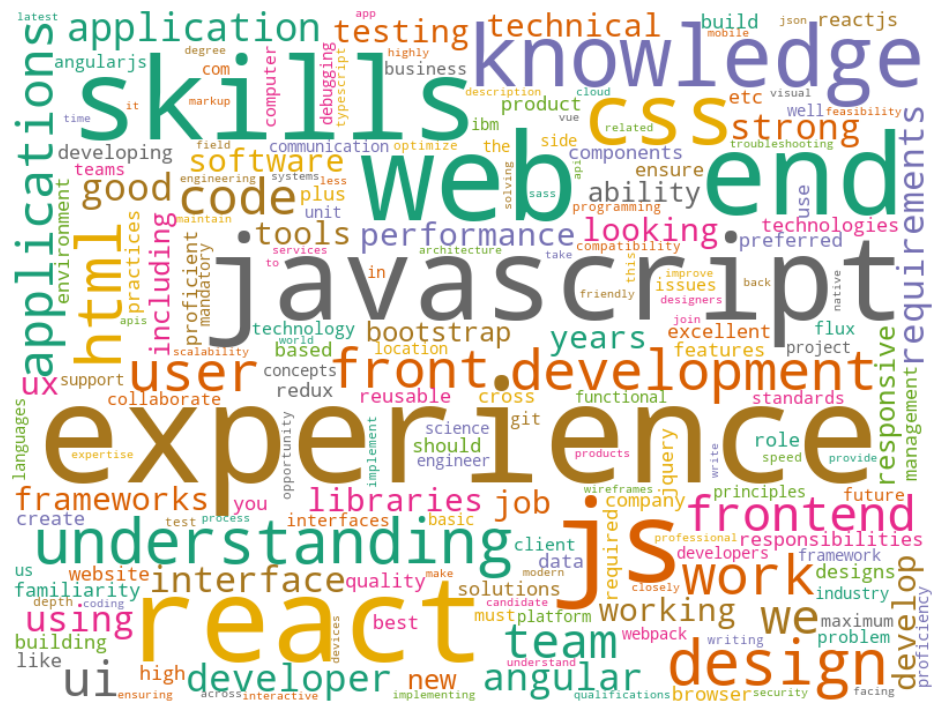

In [11]:
# Create a TF-IDF Vectorizer with specific settings
tfidfvectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=2000)

# Transform the training text data using the TF-IDF Vectorizer
X_train_tfidf = tfidfvectorizer.fit_transform(list(job_advt))

# Get the feature names from the TF-IDF Vectorizer
feature_names = tfidfvectorizer.get_feature_names_out()

# Convert the sparse TF-IDF matrix to a dense matrix and then to a DataFrame
dense_tfidf = X_train_tfidf.todense()
lst2 = dense_tfidf.tolist()
df_tfidf = pd.DataFrame(lst2, columns=feature_names)

# Generate a Word Cloud based on TF-IDF weighted word frequencies
Cloud_tfidf = WordCloud(background_color="white", 
                        colormap='Dark2',
                        width=800,
                        height=600,
                        max_words=200).generate_from_frequencies(df_tfidf.T.sum(axis=1).sort_values())

# Create a figure for the TF-IDF Word Cloud
ch = plt.figure(figsize=(12, 9))

# Display the Word Cloud with appropriate settings
plt.imshow(Cloud_tfidf, interpolation='bilinear')
plt.axis("off")

# Save the TF-IDF Word Cloud as an image
plt.savefig('word_cloud.png')

# Show the TF-IDF Word Cloud
plt.show()

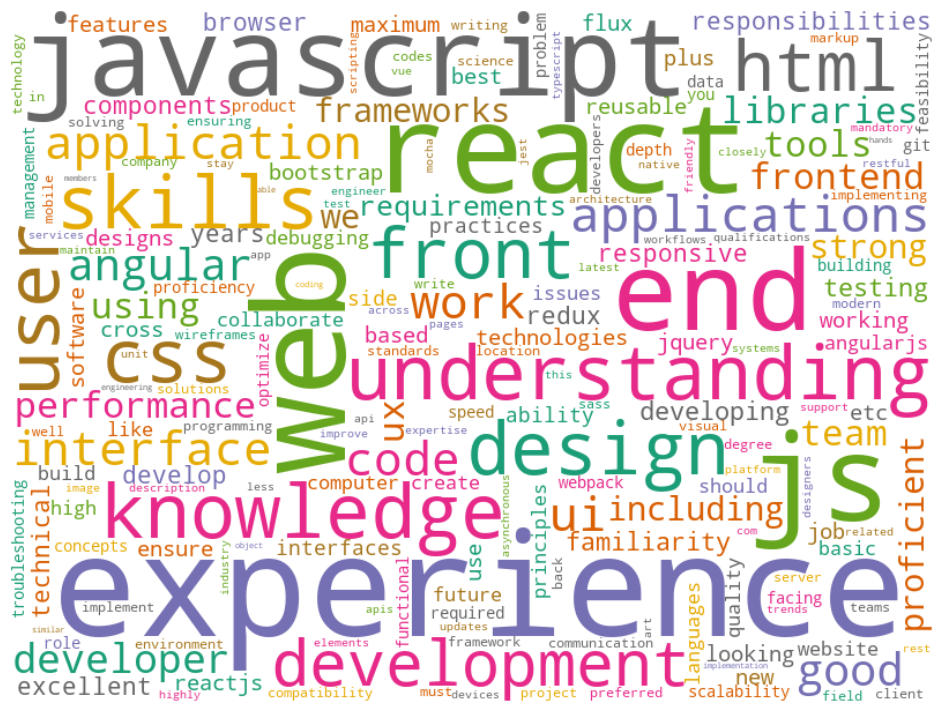

In [16]:
# Transpose the TF-IDF DataFrame for further processing
df_tfidf_t = df_tfidf.transpose()

# Reduce components using Principal Component Analysis (PCA) for Euclidean distance visualization
pca = decomposition.PCA(n_components=1)
pca.fit(df_tfidf_t)
# Transform and create a DataFrame with reduced components using PCA
df_fc_cleaned_reduced_euc = pd.DataFrame(pca.transform(df_tfidf_t).transpose(),
                                         index=['PC_1'],
                                         columns=df_tfidf_t.transpose().columns)
# Transpose the reduced DataFrame
df_fc_cleaned_reduced_euc_t = df_fc_cleaned_reduced_euc.transpose()

# Generate a Word Cloud based on TF-IDF weighted word frequencies from reduced components
Cloud_tfidf = WordCloud(background_color="white",
                        max_words=200,
                        width=800,
                        height=600,
                        colormap='Dark2').generate_from_frequencies(df_fc_cleaned_reduced_euc_t.sum(axis=1))

# Create a figure for the TF-IDF Word Cloud
ch = plt.figure(figsize=(12, 9))

# Display the Word Cloud with appropriate settings
plt.imshow(Cloud_tfidf, interpolation='bilinear')
plt.axis("off")

# Save the TF-IDF Word Cloud as an image
plt.savefig('word_cloud_pca.png')

# Show the TF-IDF Word Cloud
plt.show()
